# Exploratory Data Analsis and Project Scope

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import utils

from datetime import datetime

from sql_queries import *

### General Reference

In [2]:
airports = pd.read_csv('data/airport_codes.csv')




In [3]:
start_epoch = pd.Timestamp('1960-1-1')

In [4]:
with open('./data/I94_SAS_Labels_Descriptions.sas') as f:
    f_content = f.read()
    f_content = f_content.replace("\t", "")

In [5]:
type(f_content)

str

In [6]:
def code_mapper(file, label):
    """ Creates map b/t codes and descriptions/names.
    
    file: document that contains content
    label: The attribute that will be mapped.
    
    """
    file2 = file([label])
    file2 = file2[:file2.index(";")].sploit("\n")
    file2 = [item.replace("", "") for item in file2]
    content = [item.split("=") for item in file2[1:]]
    map_dict = {item[0].strip(): item[1].strip() for item in content if len(item) == 2}
    return map_dict

In [7]:
#i94cit_res = code_mapper(f_content, "i94cntyl")

---
## Airports

#### Notes
- Use iata_code as unique identifies. IATA = International Airport Transport Association


#### Extract Conditions
- iso_country = "US"
- type = "large_airport" or "medium_airport"


#### Errors
- Duplicate values
- Missing values - Do not accep

In [8]:
airports.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [9]:
usa_airports = airports[airports.iso_country == 'US'].copy()
usa_airports.dropna(subset=['iata_code'], how='any', inplace=True)
usa_airports.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
440,07FA,small_airport,Ocean Reef Club Airport,8.0,NaN,US,US-FL,Key Largo,07FA,OCA,07FA,"-80.274803161621, 25.325399398804"
594,0AK,small_airport,Pilot Station Airport,305.0,NaN,US,US-AK,Pilot Station,NaN,PQS,0AK,"-162.899994, 61.934601"
673,0CO2,small_airport,Crested Butte Airpark,8980.0,NaN,US,US-CO,Crested Butte,0CO2,CSE,0CO2,"-106.928341, 38.851918"
1088,0TE7,small_airport,LBJ Ranch Airport,1515.0,NaN,US,US-TX,Johnson City,0TE7,JCY,0TE7,"-98.62249755859999, 30.251800537100003"
1402,13MA,small_airport,Metropolitan Airport,418.0,NaN,US,US-MA,Palmer,13MA,PMX,13MA,"-72.31140136719999, 42.223300933800004"


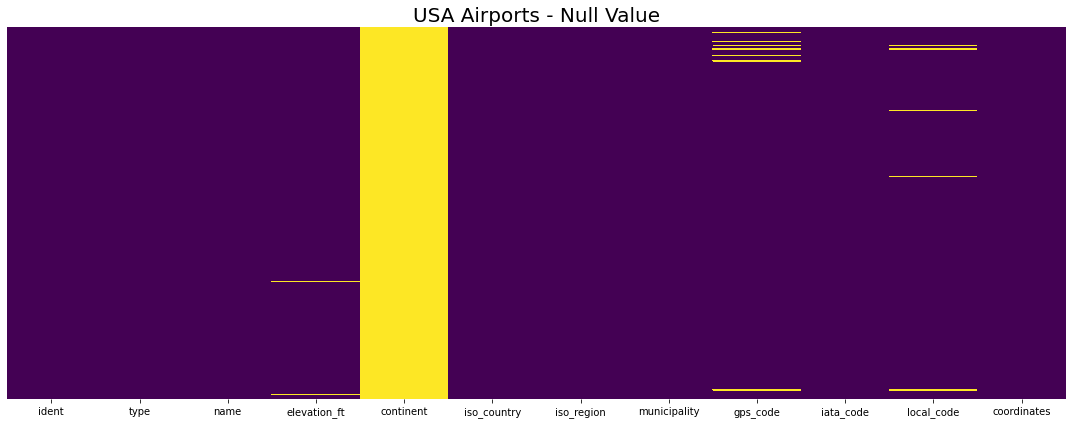

In [10]:
utils.plot_null_val_heatmap(usa_airports, "USA Airports - Null Value", (15,6))

---
## USA Cities Demographics

#### Notes
- Can I join the `cities` dataset to `airports` dataset by the `City` feature  to the `municipality` feature?
- There are 3 missing states - Vermont, West Virginia, and Wyoming.
- The dataset contains information about the demographics of all US cities and census-designated places with a population greater or equal to 65,000.
- Should I scrape the census for additional data?


In [11]:
cities = pd.read_csv('data/us_cities_demographics.csv', delimiter=';')
cities.tail()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
2886,Stockton,California,32.5,150976.0,154674.0,305650,12822.0,79583.0,3.16,CA,American Indian and Alaska Native,19834
2887,Southfield,Michigan,41.6,31369.0,41808.0,73177,4035.0,4011.0,2.27,MI,American Indian and Alaska Native,983
2888,Indianapolis,Indiana,34.1,410615.0,437808.0,848423,42186.0,72456.0,2.53,IN,White,553665
2889,Somerville,Massachusetts,31.0,41028.0,39306.0,80334,2103.0,22292.0,2.43,MA,American Indian and Alaska Native,374
2890,Coral Springs,Florida,37.2,63316.0,66186.0,129502,4724.0,38552.0,3.17,FL,White,90896


In [12]:
cities.columns = ["city", "state", "median_age", "male_pop", "female_pop", "total_pop", "num_veterans", "num_foreigners",
                  "avg_hh_size", "state_code", "race", "count"]
cities.tail()

,city,state,median_age,male_pop,female_pop,total_pop,num_veterans,num_foreigners,avg_hh_size,state_code,race,count
2886,Stockton,California,32.5,150976.0,154674.0,305650,12822.0,79583.0,3.16,CA,American Indian and Alaska Native,19834
2887,Southfield,Michigan,41.6,31369.0,41808.0,73177,4035.0,4011.0,2.27,MI,American Indian and Alaska Native,983
2888,Indianapolis,Indiana,34.1,410615.0,437808.0,848423,42186.0,72456.0,2.53,IN,White,553665
2889,Somerville,Massachusetts,31.0,41028.0,39306.0,80334,2103.0,22292.0,2.43,MA,American Indian and Alaska Native,374
2890,Coral Springs,Florida,37.2,63316.0,66186.0,129502,4724.0,38552.0,3.17,FL,White,90896


In [15]:
cities.sort_values(["state", "city", "count"], axis=0, inplace=True)

In [16]:
cities2 = cities.drop_duplicates(subset=["state", "city"],
                                keep='last')

In [17]:
sum(cities2['total_pop']) == sum(cities['count']) 

False

In [18]:
sum(cities2['total_pop'])

116712213

In [19]:
sum(cities['count']) 

141554272

---
## Visits

Need to convert countries to name

In [20]:
visits = pd.read_csv('data/immigration_data_sample.csv')

visits.rename({'Unnamed: 0': 'visit_id'}, axis=1, inplace=True)

In [21]:
# visits.iloc[:, :30]

In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   visit_id  1000 non-null   int64  
 1   cicid     1000 non-null   float64
 2   i94yr     1000 non-null   float64
 3   i94mon    1000 non-null   float64
 4   i94cit    1000 non-null   float64
 5   i94res    1000 non-null   float64
 6   i94port   1000 non-null   object 
 7   arrdate   1000 non-null   float64
 8   i94mode   1000 non-null   float64
 9   i94addr   941 non-null    object 
 10  depdate   951 non-null    float64
 11  i94bir    1000 non-null   float64
 12  i94visa   1000 non-null   float64
 13  count     1000 non-null   float64
 14  dtadfile  1000 non-null   int64  
 15  visapost  382 non-null    object 
 16  occup     4 non-null      object 
 17  entdepa   1000 non-null   object 
 18  entdepd   954 non-null    object 
 19  entdepu   0 non-null      float64
 20  matflag   954 non-null    objec

In [23]:
visits['arrdate'] = pd.to_timedelta(visits.arrdate, unit='D') + start_epoch
visits['depdate'] = pd.to_timedelta(visits.depdate, unit='D') + start_epoch
visits['biryear'] = visits.biryear.apply(int)

In [24]:
feats_to_drop =["insnum", "dtadfile", "fltno", 'i94bir', "occup", "matflag", "admnum", "entdepu", "visapost"]
visits.drop(feats_to_drop, axis=1, inplace=True)

In [25]:
visits.head()

,visit_id,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,i94visa,count,entdepa,entdepd,biryear,dtaddto,gender,airline,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,2016-04-22,1.0,HI,2016-04-29,2.0,1.0,G,O,1955,07202016,F,JL,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,2016-04-23,1.0,TX,2016-04-24,2.0,1.0,G,R,1990,10222016,M,*GA,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,2016-04-07,1.0,FL,2016-04-27,2.0,1.0,G,O,1940,07052016,M,LH,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,2016-04-28,1.0,CA,2016-05-07,2.0,1.0,G,O,1991,10272016,M,QR,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,2016-04-06,3.0,NY,2016-04-09,2.0,1.0,Z,K,1997,07042016,F,NaN,WT


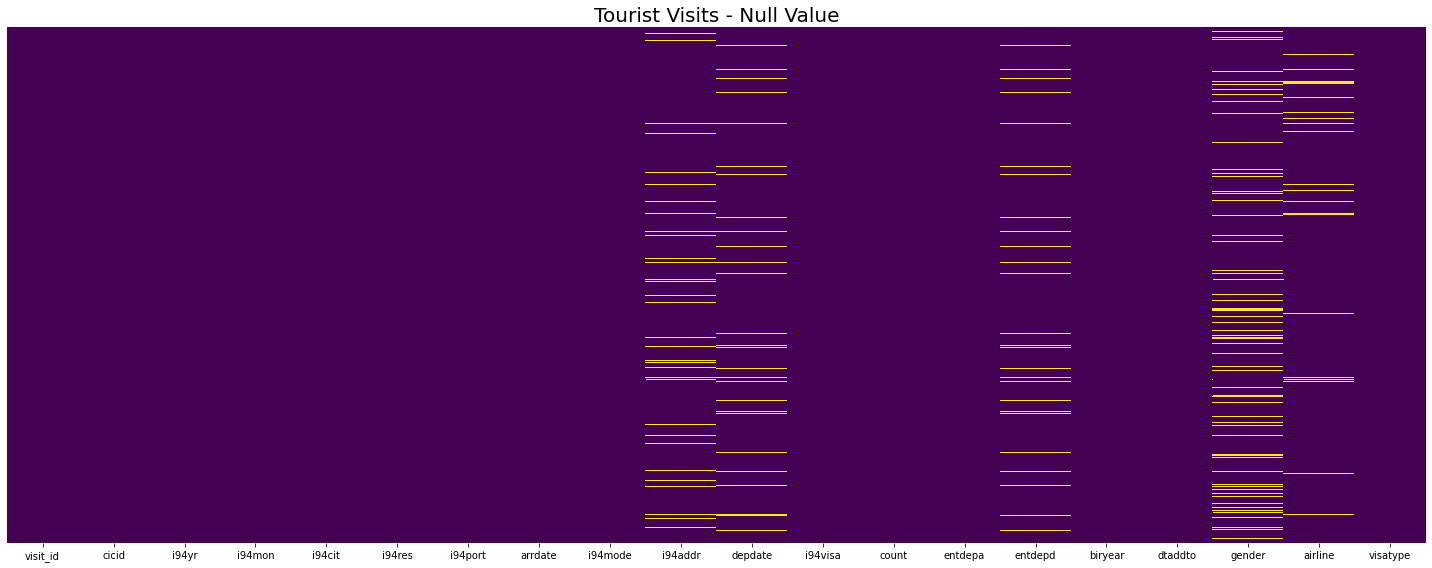

In [26]:
utils.plot_null_val_heatmap(visits, "Tourist Visits - Null Value", (20,8))

In [27]:
for col in visits.columns:
    print(f"{col}: {visits[col].nunique()}")

visit_id: 1000
cicid: 1000
i94yr: 1
i94mon: 1
i94cit: 88
i94res: 91
i94port: 70
arrdate: 30
i94mode: 4
i94addr: 51
depdate: 109
i94visa: 3
count: 1
entdepa: 9
entdepd: 10
biryear: 85
dtaddto: 99
gender: 3
airline: 101
visatype: 10


In [28]:
visits.matflag.unique()

AttributeError: 'DataFrame' object has no attribute 'matflag'

---
## Global Temperatures

In [5]:
weather = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')
weather = weather[weather.Country == 'United States'].copy()
weather.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99N,74.56W
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99N,74.56W
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99N,74.56W
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99N,74.56W
8439246,2013-09-01,17.408,1.048,Yonkers,United States,40.99N,74.56W


In [6]:
num_unique_usa_cities = len(weather.City.unique())
print(f"# of unique US Cities: {num_unique_usa_cities}")

# of unique US Cities: 248


In [7]:
print("Earliest date: ", weather.dt.min())
print("Latest date: ", weather.dt.max())

Earliest date:  1743-11-01
Latest date:  2013-09-01


In [8]:
weather = pd.read_csv('temperatures_by_city.csv')
weather = weather[weather.Country == 'United States'].copy()

print("Earliest date: ", weather.dt.min())
print("Latest date: ", weather.dt.max())

Earliest date:  1743-11-01
Latest date:  2013-09-01


---
## Aggregation

In [30]:
labels = pd.read_sas('data/I94_SAS_Labels_Descriptions.sas', 'sas7bdat', encoding="ISO-8859-1")

ValueError: magic number mismatch (not a SAS file?)

In [29]:
# Number of cities that exist in BOTH "cities" and "usa_med_large" dfs.
# "cities" has a total of 2,891 cities.
len(set(cities.City).intersection(set(usa_med_large.municipality)))

217